In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_data.csv
/kaggle/input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_info.csv


In [2]:
info = pd.read_csv("../input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_info.csv")
data = pd.read_csv("../input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_data.csv")

In [3]:
info.shape , data.shape

((1881, 7), (68624, 18))

In [4]:
info.head()

,Unnamed: 0,International number ID,Tropical cyclone number ID,Flag of the last data line,Difference between the time of the last data and the time of the final analysis,Name,Latest Revision
0,0,5101,NaN,Dissipation,6,,1990-10-17
1,1,5102,NaN,Dissipation,6,GEORGIA,2013-03-19
2,2,5103,NaN,Dissipation,6,HOPE,1989-06-01
3,3,5104,NaN,Dissipation,6,IRIS,2013-03-19
4,4,5105,NaN,Going out,0,JOAN,1991-07-16


In [5]:
data.head()

,Unnamed: 0,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
0,0,5101,1951,2,19,6,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,1,5101,1951,2,19,12,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,2,5101,1951,2,19,18,Tropical Depression,230,1421,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,3,5101,1951,2,20,0,Tropical Cyclone of TS intensity or higher,250,1460,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,4,5101,1951,2,20,6,Tropical Cyclone of TS intensity or higher,276,1506,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [6]:
 df = pd.merge(info, data, on='International number ID', how='outer', suffixes=('x', 'y'))

In [7]:
df.shape

(68624, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68624 entries, 0 to 68623
Data columns (total 24 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0x                                                                      68624 non-null  int64  
 1   International number ID                                                          68624 non-null  int64  
 2   Tropical cyclone number ID                                                       30021 non-null  float64
 3   Flag of the last data line                                                       68624 non-null  object 
 4   Difference between the time of the last data and the time of the final analysis  68624 non-null  int64  
 5   Name                                                                             68624 non-null  object 
 6   Latest

### **we have to drop unnecessary Columns**

In [9]:
df_1 = df.drop(columns=['Unnamed: 0x', 'International number ID','Tropical cyclone number ID','Flag of the last data line','Difference between the time of the last data and the time of the final analysis','Name','Latest Revision','Unnamed: 0y','year'])

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68624 entries, 0 to 68623
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   month                                                     68624 non-null  int64  
 1   day                                                       68624 non-null  int64  
 2   hour                                                      68624 non-null  int64  
 3   grade                                                     68624 non-null  object 
 4   Latitude of the center                                    68624 non-null  int64  
 5   Longitude of the center                                   68624 non-null  int64  
 6   Central pressure                                          68624 non-null  int64  
 7   Maximum sustained wind speed                              43356 non-null  float64
 8   Direction of the

In [11]:
df_1 = df_1.dropna()
df_1.shape

(27208, 15)

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27208 entries, 25272 to 68622
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   month                                                     27208 non-null  int64  
 1   day                                                       27208 non-null  int64  
 2   hour                                                      27208 non-null  int64  
 3   grade                                                     27208 non-null  object 
 4   Latitude of the center                                    27208 non-null  int64  
 5   Longitude of the center                                   27208 non-null  int64  
 6   Central pressure                                          27208 non-null  int64  
 7   Maximum sustained wind speed                              27208 non-null  float64
 8   Direction of

In [13]:
df_1.isna().sum()

month                                                       0
day                                                         0
hour                                                        0
grade                                                       0
Latitude of the center                                      0
Longitude of the center                                     0
Central pressure                                            0
Maximum sustained wind speed                                0
Direction of the longest radius of 50kt winds or greater    0
The longeast radius of 50kt winds or greater                0
The shortest radius of 50kt winds or greater                0
Direction of the longest radius of 30kt winds or greater    0
The longeast radius of 30kt winds or greater                0
The shortest radius of 30kt winds or greater                0
Indicator of landfall or passage                            0
dtype: int64

In [14]:
object_cols = list(df_1.select_dtypes(include='object').columns)
print(object_cols)

['grade', 'Direction of the longest radius of 50kt winds or greater', 'Direction of the longest radius of 30kt winds or greater', 'Indicator of landfall or passage']


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df["grade"].value_counts()

Tropical Depression                                                     19034
Tropical Cyclone of TS intensity or higher                              14326
Typhoon                                                                 10984
Tropical Storm                                                           9311
Extra-tropical Cyclone                                                   8042
Severe Tropical Storm                                                    6895
Just entering into the responsible area of RSMC Tokyo-Typhoon Center       32
Name: grade, dtype: int64

In [17]:
df_1 = df_1.drop(df_1[df_1['grade'] == 'Just entering into the responsible area of RSMC Tokyo-Typhoon Center'].index)

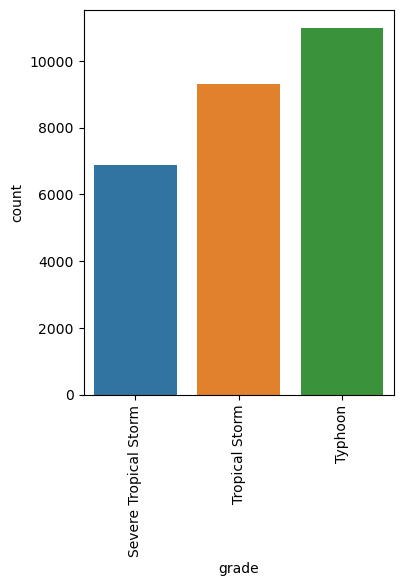

In [18]:
plt.figure(figsize=(4, 5))
sns.countplot(data=df_1, x="grade")
plt.tick_params(axis='x', rotation=90) # Rotate the Xlabel
plt.show()

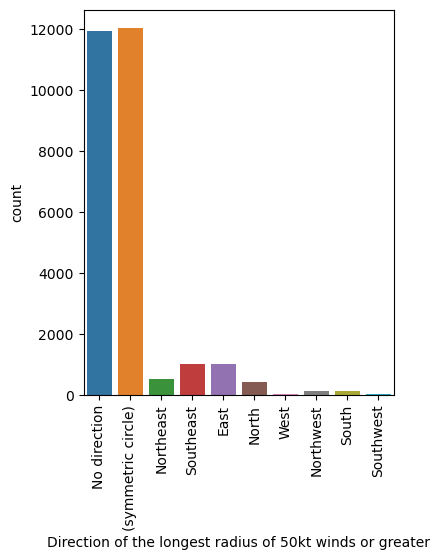

In [19]:
plt.figure(figsize=(4, 5))
sns.countplot(data=df_1, x="Direction of the longest radius of 50kt winds or greater")
plt.tick_params(axis='x', rotation=90) # Rotate the Xlabel
plt.show()

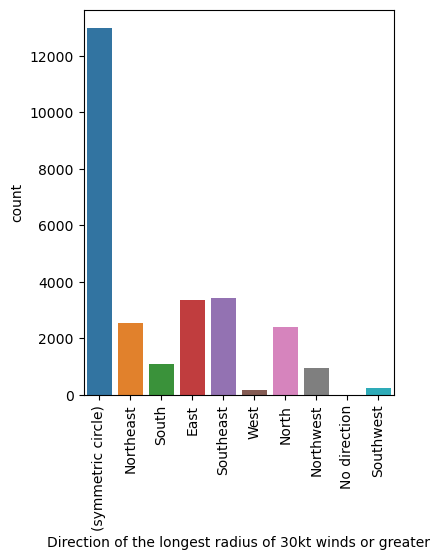

In [20]:
plt.figure(figsize=(4, 5))
sns.countplot(data=df_1, x="Direction of the longest radius of 30kt winds or greater")
plt.tick_params(axis='x', rotation=90) # Rotate the Xlabel
plt.show()

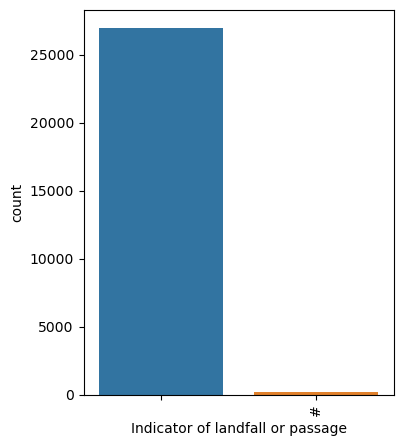

In [21]:
plt.figure(figsize=(4, 5))
sns.countplot(data=df_1, x="Indicator of landfall or passage")
plt.tick_params(axis='x', rotation=90) # Rotate the Xlabel
plt.show()

above column it not reliable to data.

In [22]:
df_1 = df_1.drop(columns=["Indicator of landfall or passage"])

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27190 entries, 25272 to 68622
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   month                                                     27190 non-null  int64  
 1   day                                                       27190 non-null  int64  
 2   hour                                                      27190 non-null  int64  
 3   grade                                                     27190 non-null  object 
 4   Latitude of the center                                    27190 non-null  int64  
 5   Longitude of the center                                   27190 non-null  int64  
 6   Central pressure                                          27190 non-null  int64  
 7   Maximum sustained wind speed                              27190 non-null  float64
 8   Direction of

In [24]:
df_1["grade"].value_counts()

Typhoon                  10984
Tropical Storm            9311
Severe Tropical Storm     6895
Name: grade, dtype: int64

In [25]:
replace_dict = {'Typhoon': 1, 'Tropical Storm': 2, 'Severe Tropical Storm': 3}
df_1 = df_1.replace(replace_dict)

In [26]:
df_1["Direction of the longest radius of 30kt winds or greater"].value_counts()

(symmetric circle)    12981
Southeast              3444
East                   3369
Northeast              2549
North                  2393
South                  1088
Northwest               956
Southwest               249
West                    159
No direction              2
Name: Direction of the longest radius of 30kt winds or greater, dtype: int64

In [27]:
dummy_cols = pd.get_dummies(df_1[['Direction of the longest radius of 30kt winds or greater']])

In [28]:
df_1 = pd.concat([df_1, dummy_cols], axis=1)

In [29]:
df_1["Direction of the longest radius of 50kt winds or greater"].value_counts()

(symmetric circle)    12030
No direction          11944
Southeast              1003
East                   1001
Northeast               505
North                   410
South                   141
Northwest               112
Southwest                29
West                     15
Name: Direction of the longest radius of 50kt winds or greater, dtype: int64

In [30]:
dummy_cols_1 = pd.get_dummies(df_1[['Direction of the longest radius of 50kt winds or greater']])

In [31]:
df_1 = pd.concat([df_1, dummy_cols_1], axis=1)

In [32]:
df_1.head(5)

,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,...,Direction of the longest radius of 50kt winds or greater_(symmetric circle),Direction of the longest radius of 50kt winds or greater_East,Direction of the longest radius of 50kt winds or greater_No direction,Direction of the longest radius of 50kt winds or greater_North,Direction of the longest radius of 50kt winds or greater_Northeast,Direction of the longest radius of 50kt winds or greater_Northwest,Direction of the longest radius of 50kt winds or greater_South,Direction of the longest radius of 50kt winds or greater_Southeast,Direction of the longest radius of 50kt winds or greater_Southwest,Direction of the longest radius of 50kt winds or greater_West
25272,3,28,0,3,56,1588,990,50.0,No direction,0.0,...,0,0,1,0,0,0,0,0,0,0
25273,3,28,6,3,61,1582,996,50.0,No direction,0.0,...,0,0,1,0,0,0,0,0,0,0
25274,3,28,12,3,66,1575,1000,50.0,No direction,0.0,...,0,0,1,0,0,0,0,0,0,0
25275,3,28,18,2,70,1568,1002,45.0,No direction,0.0,...,0,0,1,0,0,0,0,0,0,0
25276,3,29,0,2,73,1560,1002,45.0,No direction,0.0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
df_1 = df_1.drop(columns=["Direction of the longest radius of 50kt winds or greater","Direction of the longest radius of 30kt winds or greater"])

In [34]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27190 entries, 25272 to 68622
Data columns (total 32 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   month                                                                        27190 non-null  int64  
 1   day                                                                          27190 non-null  int64  
 2   hour                                                                         27190 non-null  int64  
 3   grade                                                                        27190 non-null  int64  
 4   Latitude of the center                                                       27190 non-null  int64  
 5   Longitude of the center                                                      27190 non-null  int64  
 6   Central pressure                  

In [35]:
features = df_1.drop(columns=["Central pressure"])
target = df_1["Central pressure"]

### **Scale the data**

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(features)
scaled_features = scaler.transform(features)

In [37]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X, X_t, Y, Y_t = train_test_split(scaled_features,target, test_size=0.99, random_state=500)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)


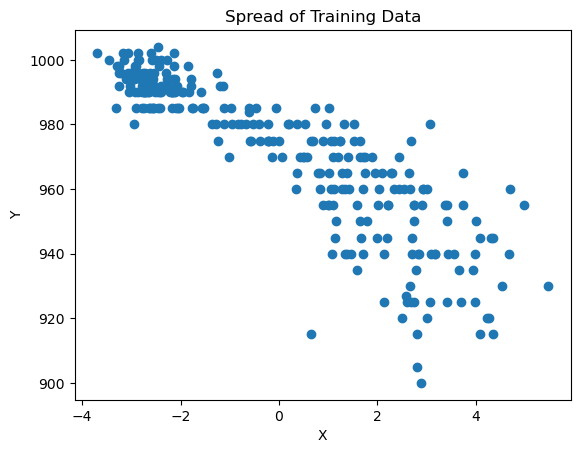

In [38]:
plt.scatter(X_pca, Y)

# add a title and axis labels
plt.title('Spread of Training Data')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.05, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("rmse :",rmse)

rmse : 5.126937292234664


In [42]:
from sklearn.metrics import r2_score

# calculate R2 score on test data
r2 = r2_score(y_test, y_pred)
print("r2 : ",r2)

r2 :  0.9491621365059841
